In [78]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import yfinance as yf
plt.style.use('fivethirtyeight')

In [79]:
df = pd.read_csv('AAPL.csv')
df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [80]:
# 計算MACD
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()
signal.head()

0    0.000000
1   -0.000107
2   -0.000417
3   -0.000793
4   -0.001136
Name: Close, dtype: float64

In [81]:
macd_parameter = (12, 26, 9)
ShortEMA = df.Close.ewm(span=macd_parameter[0], adjust=False).mean()
LongEMA = df.Close.ewm(span=macd_parameter[1], adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=macd_parameter[2], adjust=False).mean()
signal.head()

0    0.000000
1   -0.000107
2   -0.000417
3   -0.000793
4   -0.001136
Name: Close, dtype: float64

In [82]:
df['MACD'] = MACD
df['Signal_Line'] = signal
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line
10470,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800,-4.310890,-4.403599
10471,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89047400,-3.644627,-4.251804
10472,2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,-3.081091,-4.017662
10473,2022-06-28,142.130005,143.419998,137.320007,137.440002,137.440002,67083400,-2.941101,-3.802350
10474,2022-06-29,137.460007,140.669998,136.669998,139.229996,139.229996,66177800,-2.655114,-3.572902


In [83]:
# 設定買賣signal

def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1

    for i in range (0, len(signal)):
        if signal['MACD'][i] > signal['Signal_Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                # 買入signal
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)

        elif signal['MACD'][i] < signal['Signal_Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                # 賣出signal
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
    return (Buy, Sell)

df['Buy_Signal_Price'], df['Sell_Signal_Price'] = buy_sell(df)
df.head()
df


,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,Buy_Signal_Price,Sell_Signal_Price
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0.000000,0.000000,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,-0.000534,-0.000107,NaN,0.121652
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,-0.001659,-0.000417,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,-0.002299,-0.000793,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,-0.002506,-0.001136,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10470,2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800,-4.310890,-4.403599,138.270004,NaN
10471,2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89047400,-3.644627,-4.251804,NaN,NaN
10472,2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,-3.081091,-4.017662,NaN,NaN
10473,2022-06-28,142.130005,143.419998,137.320007,137.440002,137.440002,67083400,-2.941101,-3.802350,NaN,NaN


In [84]:
import matplotlib.dates as mdates

newdate = pd.to_datetime(df['Date'])
newdate.head()
df['Date'] = newdate
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0.000000,0.000000,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,-0.000534,-0.000107,NaN,0.121652
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,-0.001659,-0.000417,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,-0.002299,-0.000793,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,-0.002506,-0.001136,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800,-4.310890,-4.403599,138.270004,NaN
2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89047400,-3.644627,-4.251804,NaN,NaN
2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,-3.081091,-4.017662,NaN,NaN


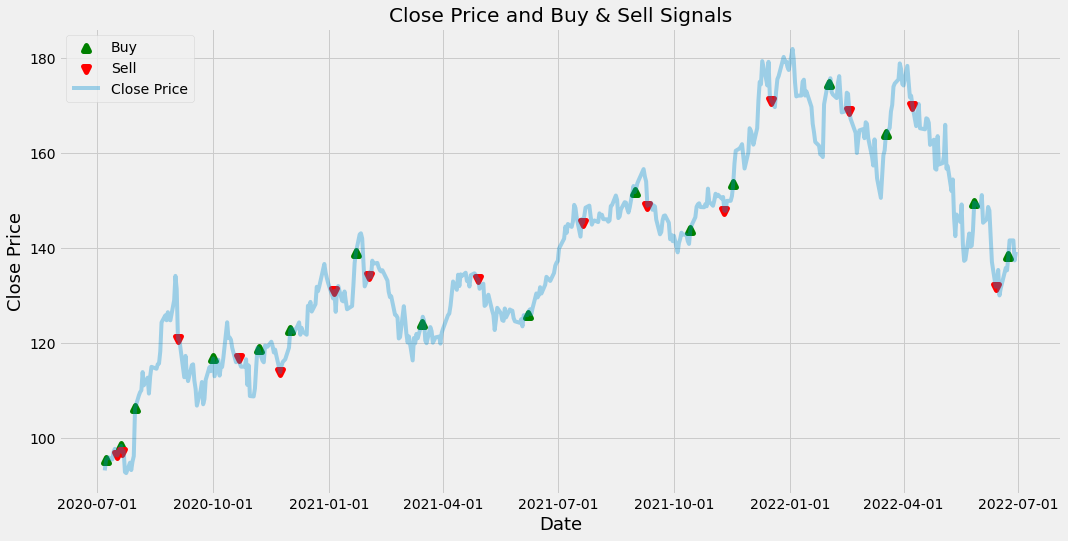

In [87]:
#import matplotlib.dates as mdates
#newdate = pd.to_datetime(df['Date'])


period = 500 # 可視化的範圍
plt.figure(figsize = (16,8))#.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) #設定x軸主刻度顯示格式（日期）

plt.scatter(df.index[-period:], df['Buy_Signal_Price'][-period:], label = "Buy", color = 'green', marker ='^', alpha = 1, linewidths=5)
plt.scatter(df.index[-period:], df['Sell_Signal_Price'][-period:], label = "Sell", color = 'red', marker ='v', alpha = 1, linewidths=5)
plt.plot(df['Close'][-period:], label = 'Close Price', alpha = 0.35)
plt.title('Close Price and Buy & Sell Signals')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.legend(loc = "upper left")
plt.show()


In [91]:
# 若我們預測未來60天的走勢，就先將收盤數據向上平移一個區間。
his_period = 60
df['Prediction'] = df[['Close']].shift(-his_period)
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,Buy_Signal_Price,Sell_Signal_Price,Prediction
Date,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,0.000000,0.000000,NaN,NaN,0.096540
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,-0.000534,-0.000107,NaN,0.121652,0.100446
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,-0.001659,-0.000417,NaN,NaN,0.099330
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,-0.002299,-0.000793,NaN,NaN,0.103237
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,-0.002506,-0.001136,NaN,NaN,0.108259
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-23,136.820007,138.589996,135.630005,138.270004,138.270004,72433800,-4.310890,-4.403599,138.270004,NaN,NaN
2022-06-24,139.899994,141.910004,139.770004,141.660004,141.660004,89047400,-3.644627,-4.251804,NaN,NaN,NaN
2022-06-27,142.699997,143.490005,140.970001,141.660004,141.660004,70207900,-3.081091,-4.017662,NaN,NaN,NaN


In [92]:
# 前面我們可視化買賣信號的時候，採用的是收盤值，為了避免訓練數據洩露，對這些數據先進行onehot處理後，作為一組特徵匯入數據集。

df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())]=1
df['Buy_Signal_Price'] = df['Buy_Signal_Price'].fillna(0)

df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())]=1
df['Sell_Signal_Price'] = df['Sell_Signal_Price'].fillna(0)

C:\Users\enoma\AppData\Local\Temp\ipykernel_17068\3074236614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())]=1
C:\Users\enoma\AppData\Local\Temp\ipykernel_17068\3074236614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())]=1


In [93]:
# 這裡我們準備預測未來60天的趨勢，所以先將數據集劃分為（2015年~ 前60天），然後再將訓練集劃分為（2015年~ 前120天），測試集為（前120天~ 前60天），即用最近60天的數據來預測未來60天的走勢。

X = np.array(df.drop(['Prediction'],1)[:-his_period])
y = np.array(df['Prediction'][:-his_period])
x_train = X[:-his_period]
x_test = X[-his_period:]
y_train = y[:-his_period]
y_test = y[-his_period:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(10355, 10) (60, 10) (10355,) (60,)


C:\Users\enoma\AppData\Local\Temp\ipykernel_17068\3555452270.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1)[:-his_period])


In [95]:
# 使用sklearn庫裡的DecisionTreeRegressor來建立模型，並用之前劃分好的訓練集對模型進行訓練。
tree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1).fit(x_train, y_train)

C:\Users\enoma\AppData\Roaming\Python\Python310\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [96]:
# 將測試集數據導入模型進行預測
prediction = tree.predict(x_test)
print("The model training score is" , tree.score(X, y))

The model training score is 0.9969097127203802


C:\Users\enoma\AppData\Local\Temp\ipykernel_17068\3107616587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


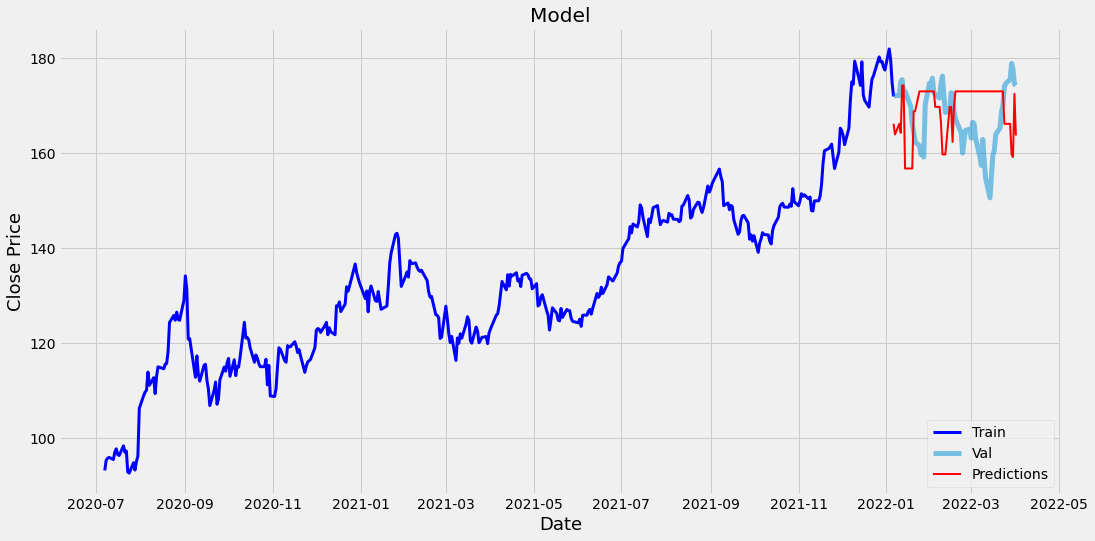

In [98]:
period = 500  # 可視化範圍
valid = df[X.shape[0]-his_period:-his_period]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df[-period:X.shape[0]-his_period+1]['Close'], linewidth=3, color='blue')
plt.plot(valid['Close'], linewidth=5, alpha=0.5)
plt.plot(valid['Prediction'], linewidth=2, color='red')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

C:\Users\enoma\AppData\Local\Temp\ipykernel_17068\637537645.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = np.array(df.drop(['Prediction'], 1)[-his_period:])


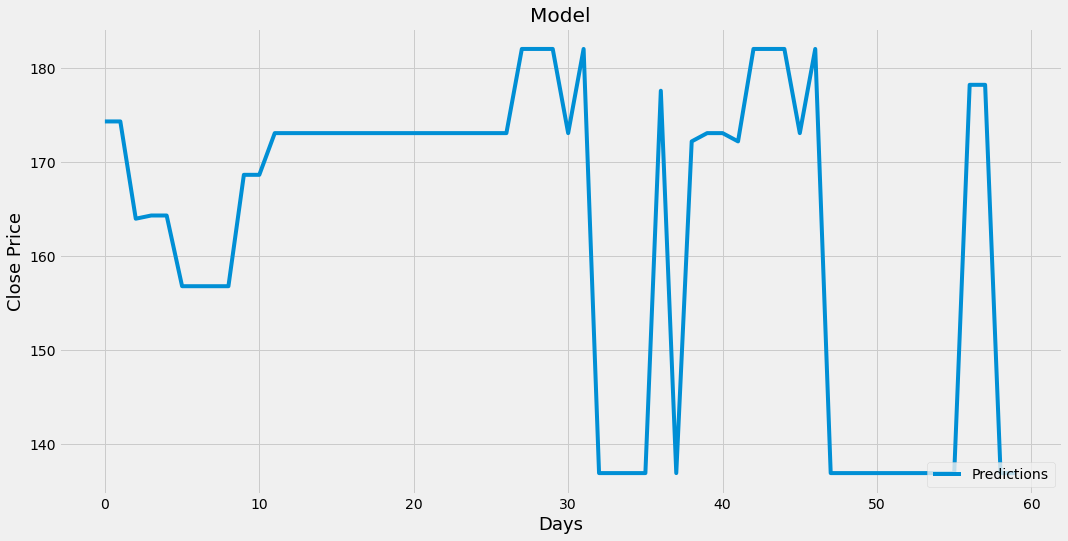

In [99]:
#我們重新獲取最近60天的數據，導入模型來獲得預測值

x_future = np.array(df.drop(['Prediction'], 1)[-his_period:])
prediction = tree.predict(x_future)
 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(prediction)
plt.legend(['Predictions'], loc='lower right')
plt.show()
